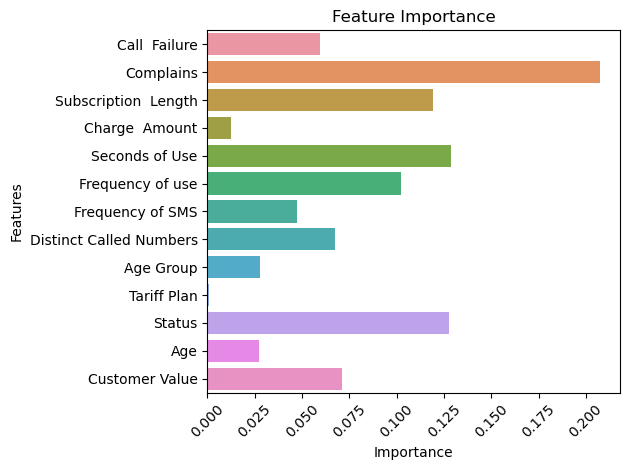

Confusion Matrix:
Accuracy
0.9349206349206349


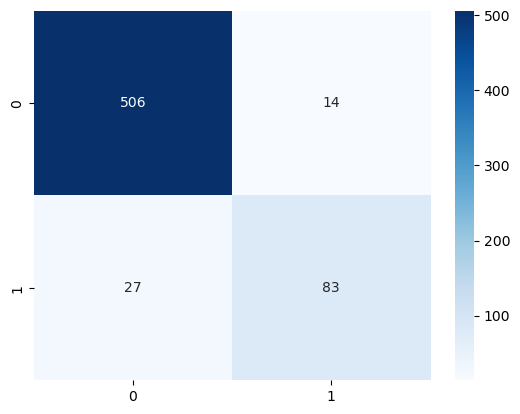

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load and preprocess the dataset
data = pd.read_excel('CustomerChurn.xlsx')
X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tune and train a Random Forest classifier
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Plot feature importance
feature_importances = best_rf_classifier.feature_importances_
sns.barplot(x=feature_importances, y=X.columns)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Evaluate the model's performance
y_pred = best_rf_classifier.predict(X_test)
print("Confusion Matrix:")
from sklearn.metrics import confusion_matrix
classnames=['0','1']
confusionmatrix=confusion_matrix(y_test,y_pred)
sns.heatmap(confusionmatrix,annot=True,yticklabels=classnames,xticklabels=classnames,fmt='g',cmap="Blues");print("Accuracy")
print(accuracy_score(y_test, y_pred))
